In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.concat(
    map(pd.read_csv, ["data/preprocessed_data/corona.csv",
                      "data/preprocessed_data/test.csv",
                     "data/preprocessed_data/train.csv",
                     "data/preprocessed_data/validation.csv"]
       ), ignore_index=True)


df


,latitude,longitude,distance_to_center,year,month,weekday,pm,holiday,mean_temperature,total_precipitation,stations_count,elevation_meters,density,count
0,45.549598,-73.541874,5.530209,2020,4,2,0,False,2.2,0.0,609,21,13,1
1,45.549598,-73.541874,5.530209,2020,4,2,1,False,2.2,0.0,609,21,13,6
2,45.510351,-73.556508,1.219082,2020,4,2,0,False,2.2,0.0,609,13,34,1
3,45.510351,-73.556508,1.219082,2020,4,2,1,False,2.2,0.0,609,13,34,15
4,45.539385,-73.541000,4.532643,2020,4,2,0,False,2.2,0.0,609,16,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384468,45.499745,-73.579034,0.903139,2018,10,2,0,False,2.4,8.2,549,54,41,11
1384469,45.499745,-73.579034,0.903139,2018,10,2,1,False,2.4,8.2,549,54,41,5
1384470,45.512832,-73.576888,1.210305,2018,10,2,0,False,2.4,8.2,549,53,45,8
1384471,45.512832,-73.576888,1.210305,2018,10,2,1,False,2.4,8.2,549,53,45,6


Text(0, 0.5, 'Frequency')

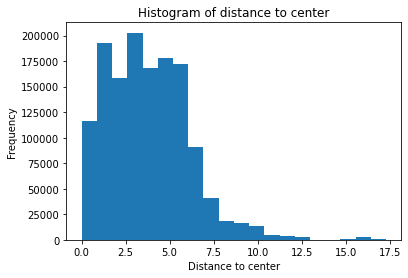

In [3]:
plt.hist(df["distance_to_center"], bins=20)
plt.title("Histogram of distance to center")
plt.xlabel("Distance to center")
plt.ylabel("Frequency")

#Stationen mit > 7,5km zum Zentrum sind outlier

(array([168398., 171934., 174883., 203790., 213773., 230773., 220922.]),
 array([2014.        , 2014.85714286, 2015.71428571, 2016.57142857,
        2017.42857143, 2018.28571429, 2019.14285714, 2020.        ]),
 <BarContainer object of 7 artists>)

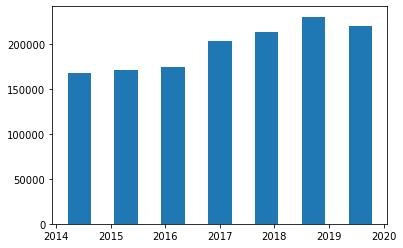

In [10]:
plt.hist(df["year"], bins = 7, rwidth = 0.5)

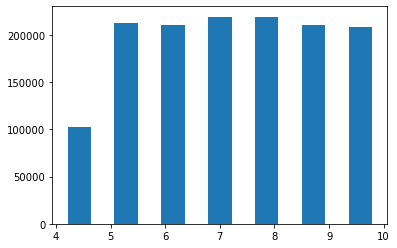

Object `unvollständig` not found.


Text(0.5, 1.0, 'Histogram of months')

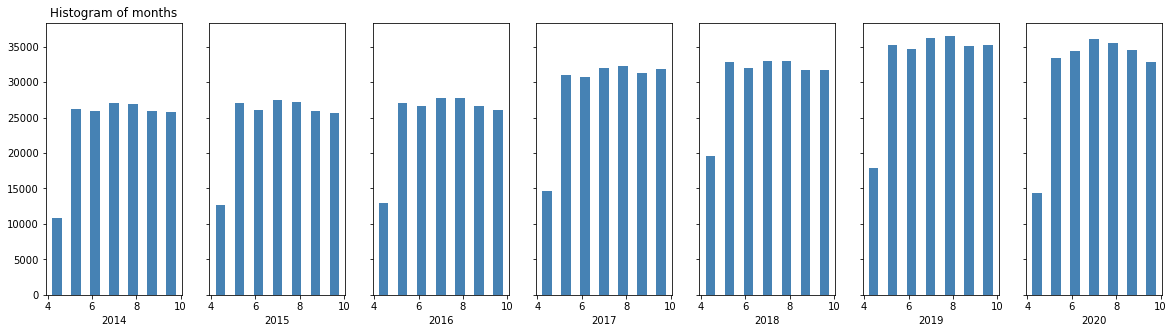

In [206]:
plt.hist(df["month"], bins = 7, rwidth=0.5)
plt.show()
Werte für April unvollständig?

#Prüf mal ob die aus dem Corona Jahr 2020 kommen? Also nach Jahr filtern
fig, axs = plt.subplots(1,7, figsize=(20,5), sharey="row")

i = 0
for year, group in df.groupby('year'):
    axs[i].hist(group['month'], bins = 7, rwidth=0.5, color = "steelblue")
    axs[i].set_xlabel(year)
    i += 1
axs[0].set_title("Histogram of months")

#ist in allen Jahren so

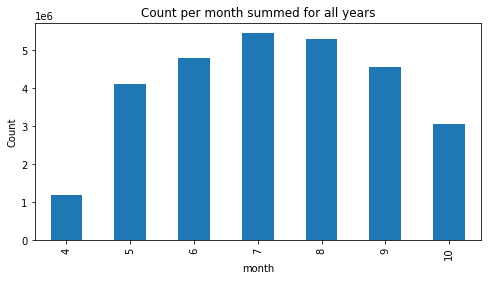

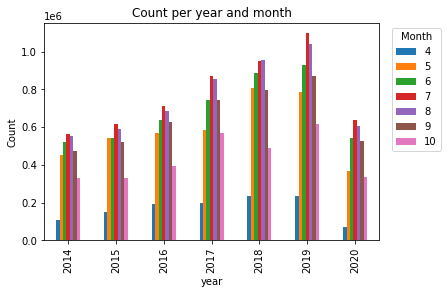

In [208]:
months = df.groupby(pd.Grouper(key="month", sort=True))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

months.plot(kind='bar', ax=ax, ylabel="Count")

ax.set_title("Count per month summed for all years")

plt.show()

# Filter für Jahre

months_df = (
    df.groupby([pd.Grouper(key='year'), 'month'])['count'].sum().unstack('month')
)
months_df.plot(kind="bar", title="Count per year and month", ylabel="Count")

plt.legend(title="Month", bbox_to_anchor=(1.2, 1))


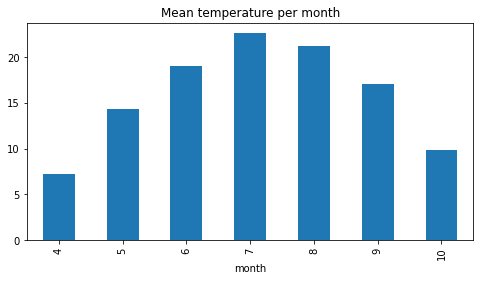

In [13]:
monthtemp = df.groupby(pd.Grouper(key="month", sort=True))["mean_temperature"].mean()

fig, ax = plt.subplots(figsize=(8, 4))

monthtemp.plot(kind='bar', ax=ax)

ax.set_title("Mean temperature per month")

plt.show()

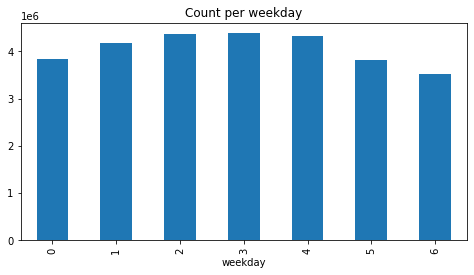

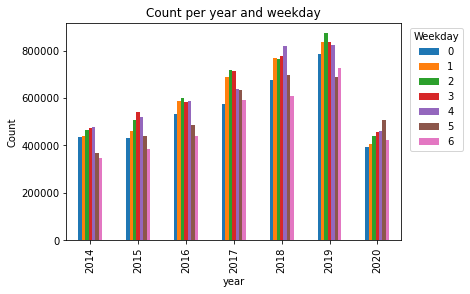

In [207]:
weekdays = df.groupby(pd.Grouper(key="weekday", sort=True))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

weekdays.plot(kind='bar', ax=ax)

ax.set_title("Count per weekday")

plt.show()

#Filter fürs Jahr

weekdays_df = (
    df.groupby([pd.Grouper(key='year'), 'weekday'])['count'].sum().unstack('weekday')
)
weekdays_df.plot(kind="bar", title="Count per year and weekday", ylabel="Count")
plt.legend(title="Weekday", bbox_to_anchor=(1.2, 1))

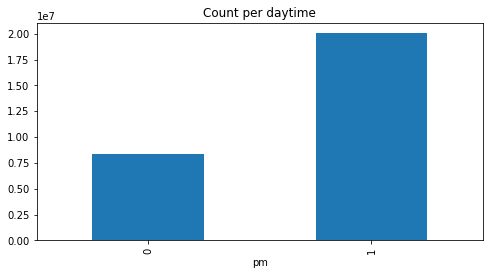

In [15]:
ampm = df.groupby(pd.Grouper(key="pm"))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

ampm.plot(kind='bar', ax=ax)

ax.set_title("Count per daytime")

plt.show()

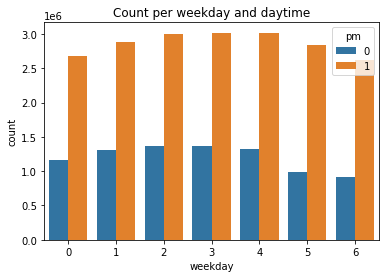

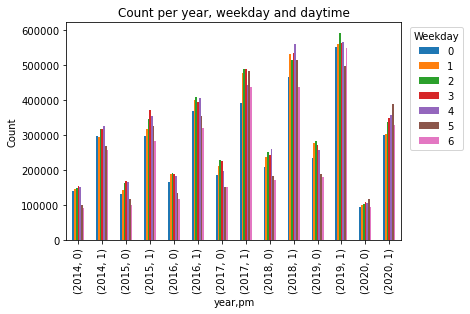

In [205]:
weekdaycounts = df.groupby(["weekday", "pm"]).agg(count=("count", 'sum'))
weekdaycounts = weekdaycounts.reset_index()

sns.barplot(x="weekday", y="count", hue="pm", data=weekdaycounts).set(title = "Count per weekday and daytime") 

# Gefiltert für das Jahr

weekdayspm_df = (
    df.groupby([pd.Grouper(key='weekday'), 'year', 'pm'])['count'].sum().unstack('weekday')
)
weekdayspm_df.plot(kind="bar", title="Count per year, weekday and daytime", ylabel="Count")

plt.legend(title="Weekday", bbox_to_anchor=(1.2, 1))


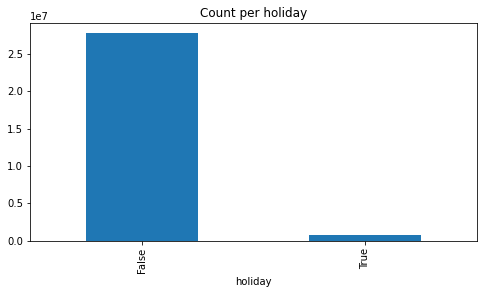

holiday
0    4455836
1     107202
Name: count, dtype: int32

<AxesSubplot:title={'center':'Relative Count per holiday in 2017'}, xlabel='holiday'>

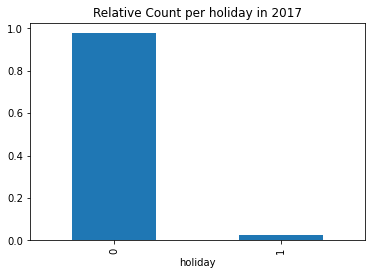

In [203]:
holidays = df.groupby(pd.Grouper(key="holiday", sort=True))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

holidays.plot(kind='bar', ax=ax)

ax.set_title("Count per holiday")

plt.show()

#Bitte relativ und gefiltert für das Jahr 2017

holidays2017 = df[df["year"] == 2017].astype(int).groupby(pd.Grouper(key="holiday", sort=True))["count"].sum()
display(holidays2017)
holidays2017[0] = 4455836/(4455836+107202)
holidays2017[1] = 107202/(4455836+107202)
holidays2017.plot(title = "Relative Count per holiday in 2017", kind="bar")

Text(0.5, 1.0, 'Histogram of Mean temperature')

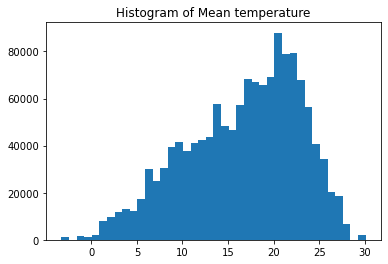

In [18]:
plt.hist(df["mean_temperature"], bins = 40)
plt.title("Histogram of Mean temperature")

# Kleiner 5 Grad und größer 25 Grad sind outliers

Text(0.5, 1.0, 'Histogram of total precipitation')

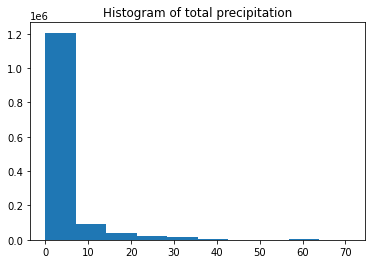

In [19]:
plt.hist(df["total_precipitation"], bins = 10)
plt.title("Histogram of total precipitation")

# total_percipitation > 10 sind outliers

# Muss geklärt werden was der Wert aussagt

609    451695
549    213773
543    203790
461    174883
456    171934
455    168398
Name: stations_count, dtype: int64

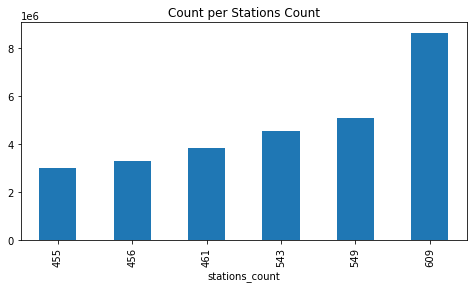

In [20]:
display(df["stations_count"].value_counts())


stationcount = df.groupby(pd.Grouper(key="stations_count", sort=True))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

stationcount.plot(kind='bar', ax=ax)

ax.set_title("Count per Stations Count")

plt.show()


#Wird nicht benötigt

Text(0.5, 1.0, 'Histogram of elevation meters')

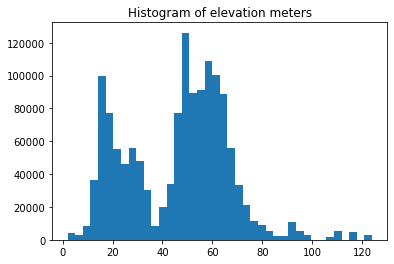

In [21]:
plt.hist(df["elevation_meters"], bins = 40)
plt.title("Histogram of elevation meters")

#elevation of city center is 42m above NN. Maybe 30m Range all over and beneath are outlier? 

Text(0.5, 1.0, 'Histogram of station density')

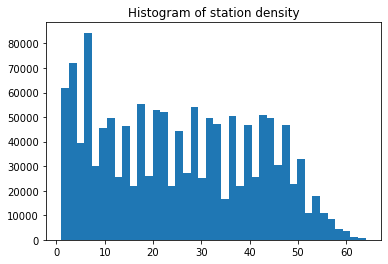

In [22]:
plt.hist(df["density"], bins = 40)
plt.title("Histogram of station density")
# Outliers schwierig auszumachen. Erkenntnis mehr als 50 Stationen im Umkreis von 1km rechnen sich nicht wirklich.
# Viele nutzen bixi in Regionen wo weniger Stationen im Umkreis sind. Karte zeigt dass mehrere Stationen auserhalb vom Zentrum ist.

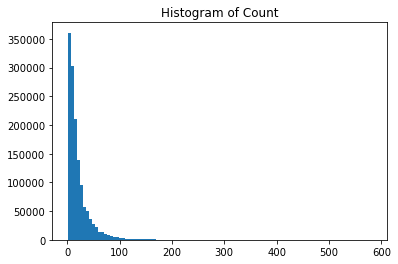

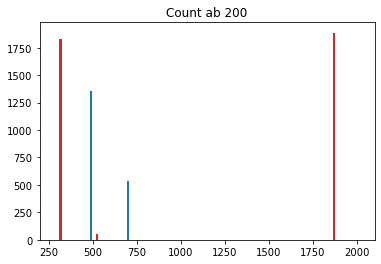

In [209]:
plt.hist(df["count"], bins = 100)
plt.title("Histogram of Count")
plt.show()

plt.hist(df[df["count"] >= 200])
plt.title("Count ab 200")
plt.xlim(xmin = 200)
plt.show()


# Keine aussagekraft. Entweder trennung nach AM und PM oder sie müssen zusammengefasst. Join by Lat und Lon
# Was ist die y-Achse ???? Wir benötigen die Beschriftungen der 

#Wird nicht benötigt


Text(0.5, 1.0, 'Elevetion meters and station density')

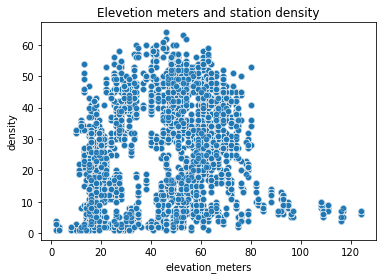

In [199]:
sns.scatterplot(data = df, x="elevation_meters", y="density", alpha=0.5)
plt.title("Elevetion meters and station density")

# ist eine veränderung der density auch ein neuer Datenpunkt. Dann bitte das Diagramm zeichnen mit der Station count von 609

Text(0.5, 1.0, 'Elevetion meters and station density with 609 stations in 2020')

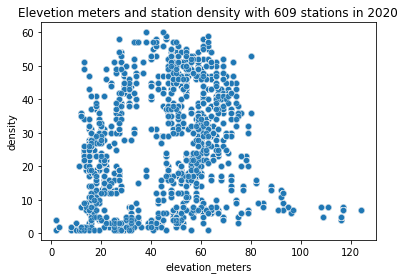

In [198]:
df609 = df[df["stations_count"] == 609]
sns.scatterplot(data = df609, x="elevation_meters", y="density", alpha=0.5)
plt.title("Elevetion meters and station density with 609 stations in 2020")

Text(0.5, 1.0, 'Elevetion meters and count')

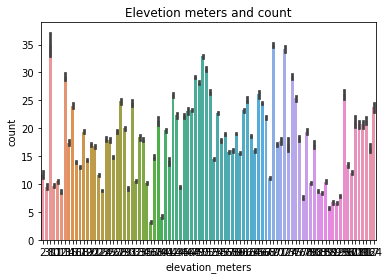

In [25]:
sns.barplot(data = df, x="elevation_meters", y="count")
plt.title("Elevetion meters and count")

# Groupt der automatisch AM und Pm weil selbe elevation_meters ?

Text(0.5, 1.0, 'Station density and count')

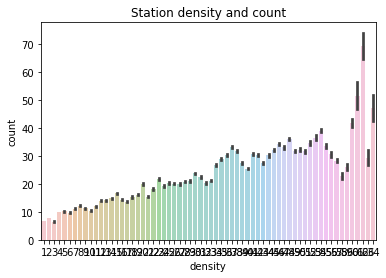

In [26]:
sns.barplot(data = df, x="density", y="count", alpha=0.5)
plt.title("Station density and count")

# Nicht aussagekräftig, da sich die Station density über die jahre verändert. Bitte auf das Jahr 2019 gruppieren

Text(0.5, 1.0, 'Station density and count in 2019')

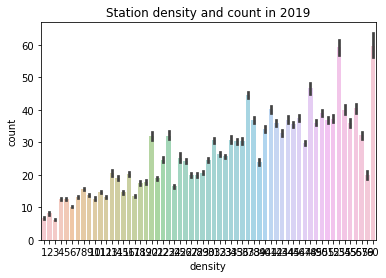

In [200]:
df2019 = df[df["year"] == 2019]
sns.barplot(data = df2019, x="density", y="count", alpha=0.5)
plt.title("Station density and count in 2019")

Text(0.5, 1.0, 'Station Count and station density')

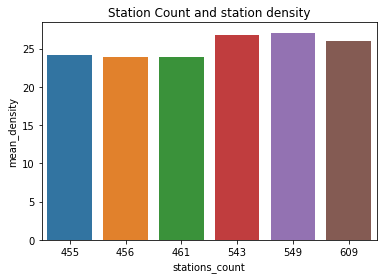

In [27]:
stationdensity = df.groupby(["stations_count"]).agg(mean_density=("density", 'mean'))
stationdensity = stationdensity.reset_index()

sns.barplot(data=stationdensity, x = "stations_count", y = "mean_density")
plt.title("Station Count and station density")